In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
leftimg = plt.imread('Downloads/left.png')
rightimg = plt.imread('Downloads/right.png')
img = plt.imread('Downloads/5.2.09.tiff')

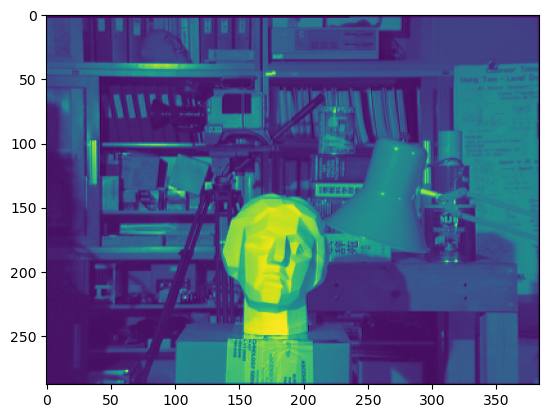

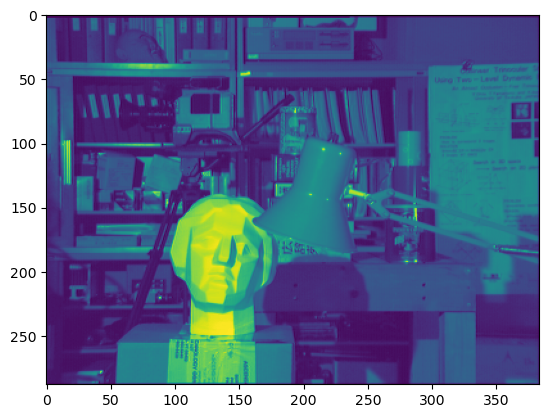

In [3]:
plt.imshow(leftimg)
plt.show()
plt.imshow(rightimg)

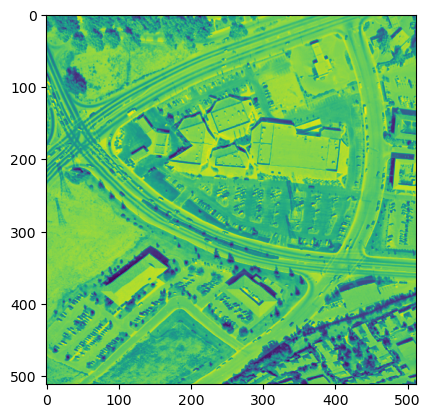

In [4]:
plt.imshow(img)

In [5]:
img_scale=img*255
img_scale.astype(int)


array([[  1,   1,   1, ...,   1,   1,   1],
       [ 58,  54,  64, ...,  93, 106, 126],
       [ 74,  53,  61, ..., 119, 100,  98],
       ...,
       [ 82, 103,  69, ..., 133, 199, 203],
       [ 83,  77,  87, ..., 148, 158, 183],
       [ 85,  79,  78, ..., 125, 131, 151]])

In [6]:
leftimg_scale=leftimg*255
rightimg_scale=rightimg*255
leftimg_scale.astype(int)
rightimg_scale.astype(int)

array([[ 1,  3,  3, ...,  2,  3,  1],
       [ 3,  6,  4, ...,  3,  4,  3],
       [ 3,  4,  4, ..., 23, 23, 11],
       ...,
       [28, 16, 13, ..., 67, 67, 33],
       [32, 16, 11, ..., 81, 79, 39],
       [17,  8,  7, ..., 45, 44, 22]])

# Question 3

In [7]:
#function for calc entropy
def entropy(pmf):
    entropy = 0
    for i in range(2):
        if pmf[i]!=0:
            entropy = -1*(pmf[i]*np.log(pmf[i]))+ entropy
    return entropy

In [8]:
def bernoulli(p):
    rv=[]
    for i in range(1000):
        rv.append(np.random.binomial(1, p))
    return rv

In [9]:
def generate_pmf(rv):
    pmf = np.array([0,0])
    for i in range(len(rv)):
        if rv[i]==0:
            pmf[0]= pmf[0]+1
        else: 
            pmf[1]= pmf[1]+1
    return pmf/np.sum(pmf)

In [10]:
p = np.arange(0,1,0.001)
rv_entropy = []
for i in range(len(p)):
    rv = bernoulli(p[i])
    pmf = np.array(generate_pmf(rv))
    rv_entropy.append(entropy(np.array(pmf)))

Text(0, 0.5, 'Entropy')

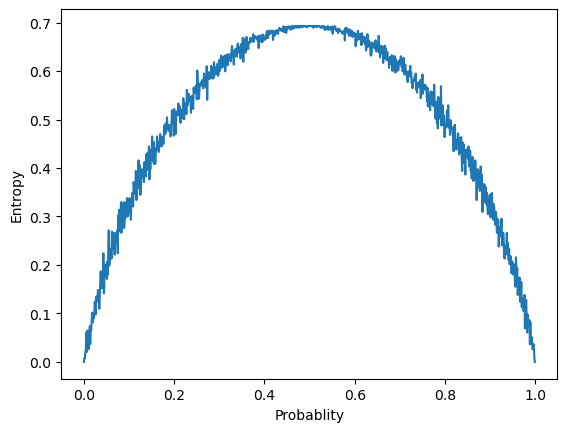

In [11]:
plt.plot(p,rv_entropy)
plt.xlabel('Probablity')
plt.ylabel('Entropy')


# Question 4

In [12]:
#function for calc entropy
def entropy(pmf):
    entropy = 0
    for i in range(pmf.shape[0]):
        if pmf[i]!=0:
            entropy = -1*(pmf[i]*np.log(pmf[i]))+ entropy
    return entropy

In [13]:
#Count the pixel intensity and make histogram
def img2hist(img):
    w,h=np.shape(img)
    hist=np.zeros((256,1))
    for i in range(w):
        for j in range(h):
            hist[int(img[i,j])]=hist[int(img[i,j])]+1   
    sumhist = np.sum(hist)
    hist = hist/sumhist
    return hist

Text(0, 0.5, 'Probablity')

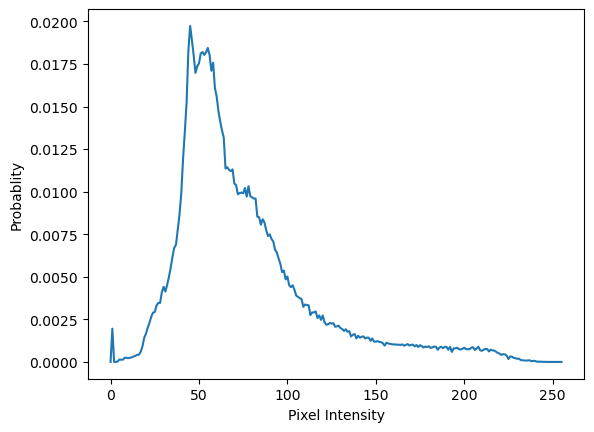

In [14]:
hist_img = img2hist(img_scale)
rng = range(256)
plt.plot(rng,hist_img)
plt.xlabel('Pixel Intensity')
plt.ylabel('Probablity')

In [15]:
print(entropy(hist_img))

[4.84786734]


# Question 5

In [16]:
# Function for joint pmf
def joint_pmf(img1,img2):
    w,h = img1.shape
    jnt_pmf = np.zeros((256,256))
    for i in range(w):
        for j in range(h):
            jnt_pmf[int(img1[i,j]),int(img2[i,j])]=jnt_pmf[int(img1[i,j]),int(img2[i,j])]+1
    #normalisation step
    for i in range(255):
        if np.sum(jnt_pmf[:,i])!=0:
            jnt_pmf = jnt_pmf/(np.sum(jnt_pmf))
    return jnt_pmf

In [17]:
jnt_pmf = joint_pmf(rightimg_scale,leftimg_scale)

In [18]:
# Function for joint entropy
def joint_entropy(jnt_pmf):
    w,h = jnt_pmf.shape
    jnt_entropy = 0
    for i in range(w):
        for j in range(h):
            if jnt_pmf[i,j]!=0:
                jnt_entropy = jnt_entropy + (-1*jnt_pmf[i,j]*np.log(jnt_pmf[i,j]))
    return jnt_entropy

In [19]:
jnt_entr = joint_entropy(jnt_pmf)
print(jnt_entr)

9.478928585594135


# Question 6

In [20]:
jnt_pmf.shape

(256, 256)

In [21]:
# Function for Conditional PMF  from Joint PMF
def conditional_pmf(jnt_pmf,index):
    w,h = jnt_pmf.shape
    #P(y/x)
    conditional_pmf = []
    if index ==1:
        for i in range(w):
            temp = np.sum(jnt_pmf[i,:])
            conditional_pmf.append(temp)
    #P(x/y)
    if index ==0:
        for i in range(w):
            temp = np.sum(jnt_pmf[:,i])
            conditional_pmf.append(temp)
    return conditional_pmf

In [22]:
# Function for Conditional Entropy from Joint PMF
def conditional_entr(jnt_pmf,index):
    w,h = jnt_pmf.shape
    jnt_entropy_xy = joint_entropy(jnt_pmf)
    #H(x/y)=H(x,y)-H(x)
    #Find the the pmf of X
    pmf = []
    if index == 1:
        for i in range(w):
            temp = np.sum(jnt_pmf[i,:])
            pmf.append(temp)
        pmf = np.array(pmf)
        entr_x = entropy(pmf)
        cond_entr = jnt_entropy_xy-entr_x
    if index == 0:
        for i in range(w):
            temp = np.sum(jnt_pmf[:,i])
            pmf.append(temp)
        pmf = np.array(pmf)
        entr_y = entropy(pmf)
        cond_entr = jnt_entropy_xy-entr_y
    return cond_entr

1.0


Text(0, 0.5, 'Probablity')

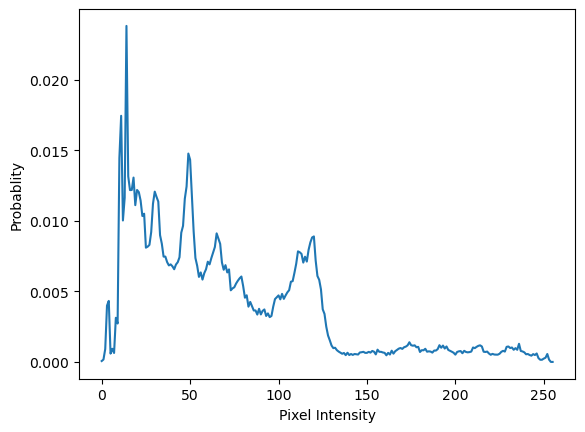

In [23]:
cond_pmf = conditional_pmf(jnt_pmf,1)
print(np.sum(cond_pmf))
plt.plot(cond_pmf)
plt.xlabel('Pixel Intensity')
plt.ylabel('Probablity')

In [24]:
cond_entr = conditional_entr(jnt_pmf,1)
print(cond_entr)

4.433769819947341


# Question 7

In [25]:
#KL divergence Calc. Function
def kl_divergence(pmf1,pmf2):
    klDiv = 0
    lenpmf = pmf1.shape[0]
    for i in range(lenpmf):
        if pmf2[i]!=0:
            klDiv = klDiv + pmf1[i]*(np.log(pmf1[i]/pmf2[i]))
    return klDiv

0.0002880195877804914 0.00028806568496572184


Text(0, 0.5, 'KL Divergence')

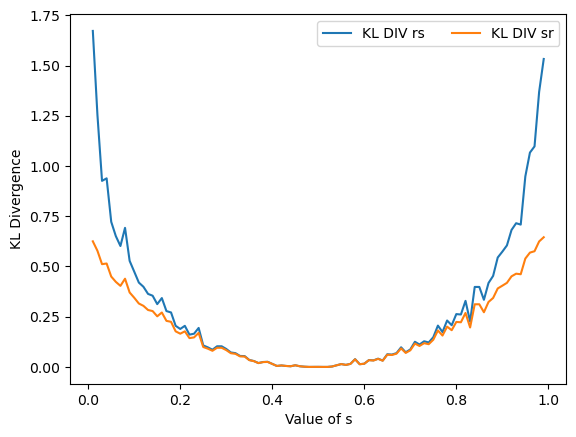

In [26]:
r = 0.5
rv1 = bernoulli(r)
s = np.arange(0.01,1,0.01)
kl_div_rs = []
kl_div_sr = []
for i in range(len(s)):
    rv2 = bernoulli(s[i])
    pmf1 = np.array(generate_pmf(rv1))
    pmf2 = np.array(generate_pmf(rv2))
    kl_div_rs.append(kl_divergence(pmf1,pmf2))
    kl_div_sr.append(kl_divergence(pmf2,pmf1))
    if s[i] == 0.5:
        print(kl_divergence(pmf1,pmf2),kl_divergence(pmf2,pmf1))
plt.plot(s,kl_div_rs,label='KL DIV rs')
plt.plot(s,kl_div_sr,label='KL DIV sr')
plt.legend(ncol=3)
plt.xlabel('Value of s')
plt.ylabel('KL Divergence')


In [28]:
#pmf of left img
pmf1 = img2hist(leftimg_scale)
#pmf of right img
pmf2 = img2hist(rightimg_scale)
metric = kl_divergence(pmf1,pmf2)
print("D(p||q) as metric:",metric)

D(p||q) as metric: [0.01046931]
